In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

In [61]:
# Read the data
df = pd.read_csv("data\DOHMH_New_York_City_Restaurant_Inspection_Results.csv")
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50110732,NaN,0,NaN,NaN,NaN,9179163288,NaN,01/01/1900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50123392,Janie's Life-Changing Baked Goods,Manhattan,212,WEST 80 STREET,10024.0,6463381189,NaN,01/01/1900,NaN,...,NaN,40.784065,-73.978420,107.0,6.0,16700.0,1032642.0,1.012270e+09,MN12,NaN
2,50132207,RAUL GONZALEZ,Brooklyn,727,GRAND STREET,11211.0,3475816373,NaN,01/01/1900,NaN,...,NaN,40.711671,-73.943607,301.0,34.0,49500.0,3069464.0,3.027830e+09,BK90,NaN
3,50119822,NaN,Queens,6116,37TH AVE,11377.0,091869379,NaN,01/01/1900,NaN,...,NaN,40.749375,-73.901377,402.0,26.0,26100.0,4027829.0,4.012160e+09,QN63,NaN
4,50125127,NaN,Bronx,2450,CRESTON AVENUE,10468.0,9176272485,NaN,01/01/1900,NaN,...,NaN,40.861841,-73.898621,205.0,14.0,23703.0,2013806.0,2.031660e+09,BX40,NaN


In [62]:
df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1'],
      dtype='object')

In [63]:
df.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,Location Point1
count,2.037290e+05,200933.000000,192820.000000,203416.000000,203416.000000,200319.000000,200319.000000,200319.000000,1.992610e+05,2.030880e+05,0.0
mean,4.727337e+07,10702.253652,21.970190,40.173208,-72.934615,252.774080,20.590518,29889.569886,2.555407e+06,2.443159e+09,NaN
std,4.143562e+06,593.832125,16.998931,4.719848,8.568335,129.594705,15.776788,31375.805417,1.340305e+06,1.332724e+09,NaN
min,3.007544e+07,8512.000000,0.000000,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,NaN
25%,4.159896e+07,10023.000000,11.000000,40.683341,-73.988892,106.000000,4.000000,8000.000000,1.049985e+06,1.010660e+09,NaN
50%,5.005543e+07,11101.000000,18.000000,40.730744,-73.956284,302.000000,20.000000,17300.000000,3.017253e+06,3.006370e+09,NaN
75%,5.009843e+07,11230.000000,29.000000,40.761575,-73.896140,401.000000,34.000000,42200.000000,4.003519e+06,4.002450e+09,NaN
max,5.013502e+07,14228.000000,157.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,NaN


In [64]:
df['VIOLATION CODE'].value_counts()

10F      28162
08A      22410
04L      14056
06D      13969
02G      11913
         ...  
15-36        1
15-29        1
04I          1
19-03        1
15-32        1
Name: VIOLATION CODE, Length: 145, dtype: int64

In [65]:
pest_control_codes = ['04K', '04L', '04M', '04N']

In [66]:
# filter the data to only include pest control violations
pest_control_df = df[df['VIOLATION CODE'].isin(pest_control_codes)]
pest_control_df

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
51,41612260,TROPICAL RESTAURANT,Queens,88-18/20,JAMAICA AVENUE,11421.0,7188468816,Mediterranean,09/01/2021,Establishment re-opened by DOHMH.,...,Cycle Inspection / Reopening Inspection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,50052708,PARC OASIS,Brooklyn,6403,11 AVENUE,11219.0,9292922010,Seafood,11/03/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.629136,-74.005393,310.0,38.0,21200.0,3141993.0,3.057450e+09,BK30,NaN
231,50047557,ENCORE RESTAURANT,Brooklyn,10005,4TH AVE,11209.0,7187453355,American,03/21/2019,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.612679,-74.033763,310.0,43.0,16200.0,NaN,3.000000e+00,BK31,NaN
261,41160851,APPLEBEE'S,Brooklyn,1360,FULTON STREET,11216.0,7189438000,American,10/22/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.680179,-73.945930,303.0,36.0,24700.0,3329709.0,3.018620e+09,BK61,NaN
281,41117350,POPEYES,Queens,21710,HILLSIDE AVENUE,11427.0,7184656812,Chicken,08/19/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.728246,-73.747249,413.0,23.0,55200.0,4228829.0,4.106770e+09,QN34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203705,50106962,PICK N PAY,Brooklyn,267,UTICA AVENUE,11213.0,3475874098,Caribbean,09/08/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.669395,-73.931051,308.0,41.0,34900.0,3037347.0,3.013910e+09,BK61,NaN
203712,50039447,CHINA HOUSE,Bronx,1572,E 174TH STEET,NaN,7188936187,Chinese,08/18/2018,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN
203716,50046794,AUNT GINNY'S,Queens,652,WOODWARD AVENUE,11385.0,3474898899,American,03/01/2023,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.705644,-73.906989,405.0,34.0,54700.0,4082900.0,4.034670e+09,QN20,NaN
203721,41105572,KABU BAR & LOUNGE,Queens,8509,NORTHERN BOULEVARD,11372.0,7184298113,Latin American,08/10/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.755873,-73.882388,403.0,25.0,33700.0,4034689.0,4.014150e+09,QN28,NaN


In [67]:
# drop rows with missing values in census tract
pest_control_df = pest_control_df.dropna(subset=['Census Tract'])

In [68]:
# drop Location Point1 column
pest_control_df = pest_control_df.drop(columns=['Location Point1'])

In [69]:
# examine pest_control_df violation_description
pest_control_df['VIOLATION DESCRIPTION'].value_counts()

Evidence of mice or live mice present in facility's food and/or non-food areas.                                                                                                                                                                                                                        8482
Filth flies or food/refuse/sewage-associated (FRSA) flies present in facility’s food and/or non-food areas.  Filth flies include house flies, little house flies, blow flies, bottle flies and flesh flies.  Food/refuse/sewage-associated flies include fruit flies, drain flies and Phorid flies.    5558
Evidence of mice or live mice in establishment's food or non-food areas.                                                                                                                                                                                                                               5389
Filth flies or food/refuse/sewage associated with (FRSA) flies or other nuisance pests  in  establis

In [85]:
# visualize the restaurant locations using gpd
# using latitute and longitude
# create a geometry column
gdf = gpd.GeoDataFrame(pest_control_df, geometry=gpd.points_from_xy(pest_control_df.Longitude, 
                                                                    pest_control_df.Latitude))

c:\Users\steve\.conda\envs\geo_env\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [87]:
# drop DBA, BUILDING, STREET, PHONE, CUISINE DESCRIPTION, INSPECTION DATE columns in gdf 
gdf = gdf.drop(columns=['DBA', 'BUILDING', 'STREET', 'PHONE', 'CUISINE DESCRIPTION', "CRITICAL FLAG"])

In [88]:
# seperate data into 2018, 2019, 2020
gdf_2018 = gdf[gdf['INSPECTION DATE'].str.contains('2018')]
gdf_2019 = gdf[gdf['INSPECTION DATE'].str.contains('2019')]
gdf_2020 = gdf[gdf['INSPECTION DATE'].str.contains('2020')]

In [89]:
gdf_2018.head()

,CAMIS,BORO,ZIPCODE,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,SCORE,GRADE,GRADE DATE,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,geometry
1502,50070629,Queens,11105.0,04/06/2018,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,18.0,NaN,NaN,...,Pre-permit (Operational) / Initial Inspection,40.775783,-73.902485,401.0,22.0,12301.0,4016088.0,4.008090e+09,QN72,POINT (-73.90249 40.77578)
2334,50043523,Brooklyn,11219.0,10/27/2018,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,10.0,A,10/27/2018,...,Cycle Inspection / Re-inspection,40.633442,-74.005037,312.0,38.0,11600.0,3140917.0,3.057080e+09,BK88,POINT (-74.00504 40.63344)
3152,50016968,Queens,11375.0,10/03/2018,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,25.0,B,10/03/2018,...,Cycle Inspection / Re-inspection,40.720782,-73.845743,406.0,29.0,71100.0,4077496.0,4.032390e+09,QN17,POINT (-73.84574 40.72078)
3810,41635173,Manhattan,10011.0,03/01/2018,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,25.0,NaN,NaN,...,Cycle Inspection / Initial Inspection,40.733245,-73.998683,102.0,3.0,6300.0,1082486.0,1.005720e+09,MN23,POINT (-73.99868 40.73325)
4111,41004284,Manhattan,10019.0,09/05/2018,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,9.0,A,09/05/2018,...,Cycle Inspection / Initial Inspection,40.763501,-73.975232,105.0,4.0,11201.0,1035067.0,1.012730e+09,MN17,POINT (-73.97523 40.76350)


In [90]:
gdf_2019.head(5)

,CAMIS,BORO,ZIPCODE,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,SCORE,GRADE,GRADE DATE,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,geometry
231,50047557,Brooklyn,11209.0,03/21/2019,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,42.0,NaN,NaN,...,Cycle Inspection / Initial Inspection,40.612679,-74.033763,310.0,43.0,16200.0,NaN,3.000000e+00,BK31,POINT (-74.03376 40.61268)
935,50010316,Manhattan,10029.0,12/10/2019,Violations were cited in the following area(s).,04K,Evidence of rats or live rats present in facil...,13.0,NaN,NaN,...,Cycle Inspection / Initial Inspection,40.791132,-73.938971,111.0,8.0,17000.0,1052808.0,1.016800e+09,MN33,POINT (-73.93897 40.79113)
1508,41449659,Brooklyn,11234.0,12/19/2019,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,10.0,A,12/19/2019,...,Cycle Inspection / Initial Inspection,40.633516,-73.929089,318.0,45.0,72400.0,3213512.0,3.077330e+09,BK58,POINT (-73.92909 40.63352)
1586,40635454,Manhattan,10065.0,05/02/2019,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,17.0,NaN,NaN,...,Cycle Inspection / Initial Inspection,40.765970,-73.969336,108.0,4.0,11401.0,1040906.0,1.013770e+09,MN40,POINT (-73.96934 40.76597)
1599,50056065,Manhattan,10033.0,09/04/2019,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,20.0,B,09/04/2019,...,Cycle Inspection / Re-inspection,40.849635,-73.936311,112.0,10.0,26500.0,1064282.0,1.021760e+09,MN36,POINT (-73.93631 40.84964)


In [91]:
gdf_2020.head(5)

,CAMIS,BORO,ZIPCODE,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,SCORE,GRADE,GRADE DATE,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,geometry
1660,41401730,Manhattan,10018.0,02/13/2020,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,12.0,A,02/13/2020,...,Cycle Inspection / Re-inspection,40.755941,-73.992665,104.0,3.0,11500.0,1013653.0,1.007620e+09,MN15,POINT (-73.99267 40.75594)
1666,50069922,Manhattan,10023.0,03/02/2020,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,16.0,NaN,NaN,...,Cycle Inspection / Initial Inspection,40.778120,-73.980513,107.0,6.0,15700.0,1081487.0,1.011430e+09,MN14,POINT (-73.98051 40.77812)
1806,50004496,Brooklyn,11209.0,01/13/2020,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,27.0,NaN,NaN,...,Cycle Inspection / Initial Inspection,40.616723,-74.030314,310.0,43.0,5800.0,3155308.0,3.061080e+09,BK31,POINT (-74.03031 40.61672)
2011,41008413,Manhattan,10032.0,01/08/2020,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,19.0,NaN,NaN,...,Cycle Inspection / Initial Inspection,40.842762,-73.936708,112.0,10.0,25300.0,1063066.0,1.021280e+09,MN36,POINT (-73.93671 40.84276)
2163,41488028,Brooklyn,11217.0,01/14/2020,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,42.0,NaN,NaN,...,Cycle Inspection / Initial Inspection,40.684430,-73.977725,302.0,35.0,3500.0,3348849.0,3.020018e+09,BK68,POINT (-73.97772 40.68443)


In [92]:
gdf_2018

,CAMIS,BORO,ZIPCODE,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,SCORE,GRADE,GRADE DATE,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,geometry
1502,50070629,Queens,11105.0,04/06/2018,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,18.0,NaN,NaN,...,Pre-permit (Operational) / Initial Inspection,40.775783,-73.902485,401.0,22.0,12301.0,4016088.0,4.008090e+09,QN72,POINT (-73.90249 40.77578)
2334,50043523,Brooklyn,11219.0,10/27/2018,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,10.0,A,10/27/2018,...,Cycle Inspection / Re-inspection,40.633442,-74.005037,312.0,38.0,11600.0,3140917.0,3.057080e+09,BK88,POINT (-74.00504 40.63344)
3152,50016968,Queens,11375.0,10/03/2018,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,25.0,B,10/03/2018,...,Cycle Inspection / Re-inspection,40.720782,-73.845743,406.0,29.0,71100.0,4077496.0,4.032390e+09,QN17,POINT (-73.84574 40.72078)
3810,41635173,Manhattan,10011.0,03/01/2018,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,25.0,NaN,NaN,...,Cycle Inspection / Initial Inspection,40.733245,-73.998683,102.0,3.0,6300.0,1082486.0,1.005720e+09,MN23,POINT (-73.99868 40.73325)
4111,41004284,Manhattan,10019.0,09/05/2018,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,9.0,A,09/05/2018,...,Cycle Inspection / Initial Inspection,40.763501,-73.975232,105.0,4.0,11201.0,1035067.0,1.012730e+09,MN17,POINT (-73.97523 40.76350)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202662,50044853,Manhattan,10121.0,10/25/2018,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,11.0,A,10/25/2018,...,Cycle Inspection / Initial Inspection,40.750010,-73.991345,105.0,3.0,10100.0,1083026.0,1.007810e+09,MN17,POINT (-73.99135 40.75001)
202889,50074036,Queens,11430.0,11/01/2018,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,25.0,NaN,NaN,...,Pre-permit (Operational) / Initial Inspection,40.648313,-73.788281,483.0,28.0,71600.0,4000000.0,4.142600e+09,QN98,POINT (-73.78828 40.64831)
203349,50041989,Manhattan,10019.0,08/22/2018,Violations were cited in the following area(s).,04K,Evidence of rats or live rats present in facil...,12.0,A,08/22/2018,...,Cycle Inspection / Re-inspection,40.763618,-73.988835,104.0,3.0,13300.0,1025170.0,1.010410e+09,MN15,POINT (-73.98883 40.76362)
203428,40759586,Manhattan,10075.0,07/03/2018,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,12.0,A,07/03/2018,...,Cycle Inspection / Re-inspection,40.772567,-73.957350,108.0,4.0,13400.0,1044084.0,1.014310e+09,MN31,POINT (-73.95735 40.77257)


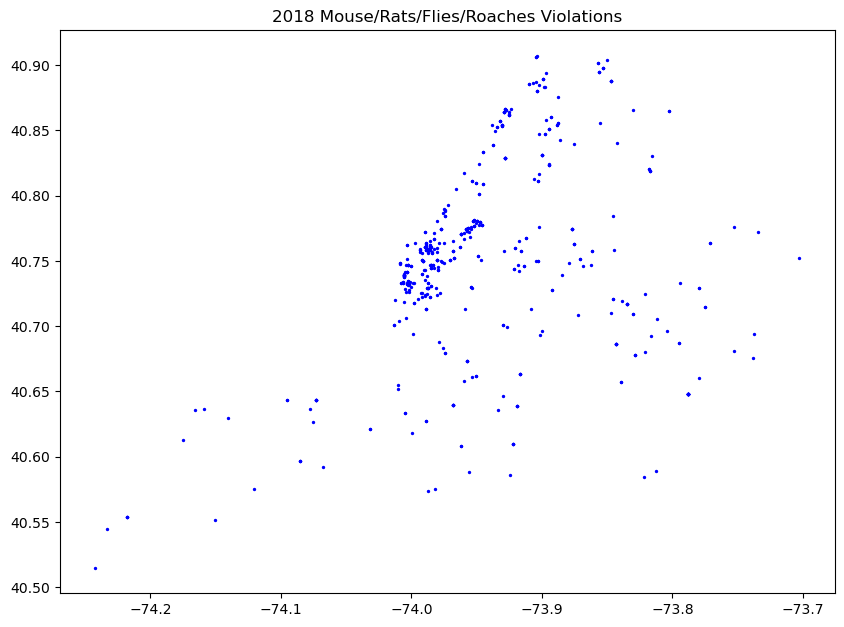

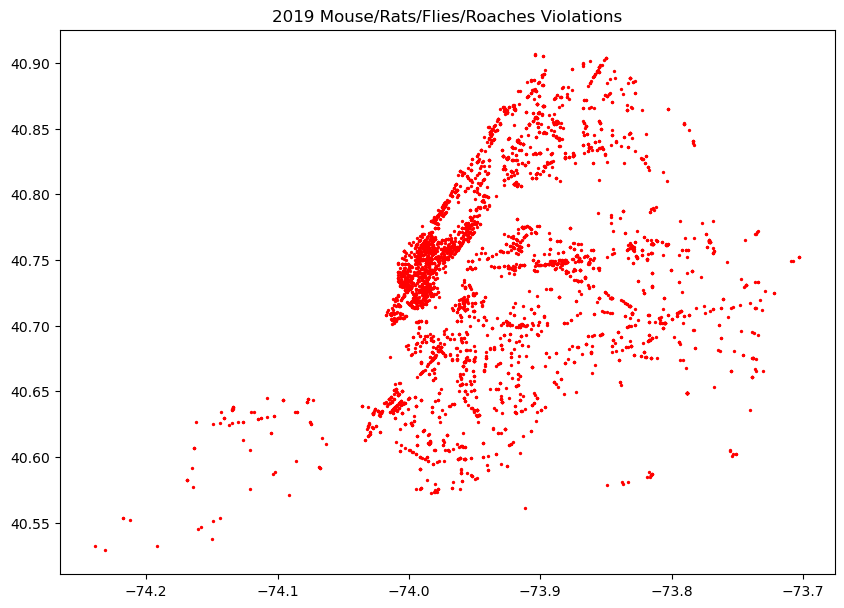

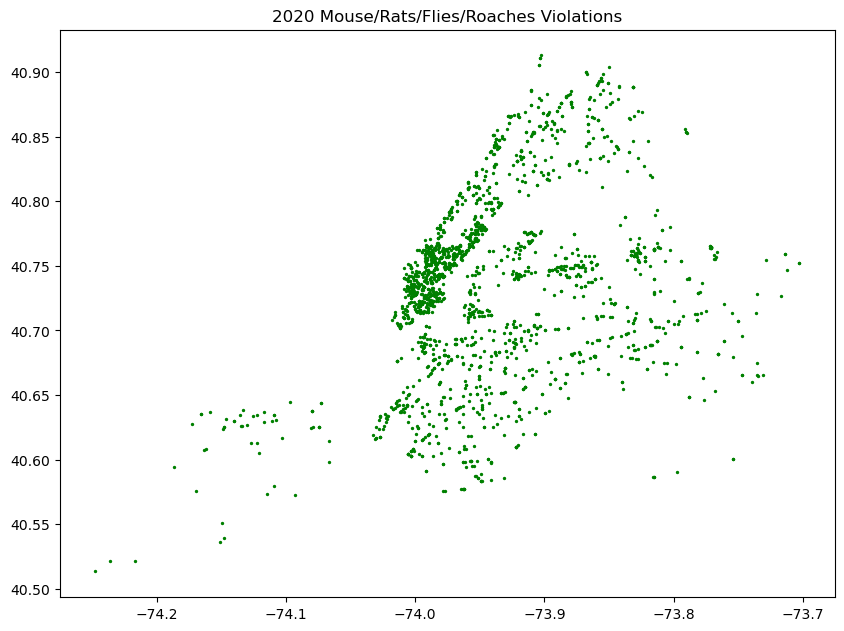

In [93]:
# plot gdfs with geometry column 
# using latitute and longitude
gdf_2018.plot(figsize=(10,10), color='blue', markersize=2)
plt.title('2018 Mouse/Rats/Flies/Roaches Violations')
gdf_2019.plot(figsize=(10,10), color='red', markersize=2)
plt.title('2019 Mouse/Rats/Flies/Roaches Violations')
gdf_2020.plot(figsize=(10,10), color='green', markersize=2)
plt.title('2020 Mouse/Rats/Flies/Roaches Violations')
plt.show()

In [94]:
# groupby NTA
gdf_2018_nta = gdf_2018.groupby('NTA').count()
gdf_2018_nta = gdf_2018_nta[['CAMIS']]
gdf_2019_nta = gdf_2019.groupby('NTA').count()
gdf_2019_nta = gdf_2018_nta[['CAMIS']]
gdf_2020_nta = gdf_2020.groupby('NTA').count()
gdf_2020_nta = gdf_2020_nta[['CAMIS']]

I'm using Neighborhood Tabulation Area for grouping by because census tract is not clear here. 

In [100]:
gdf_2018_nta.rename(columns={'CAMIS':'2018_inspection_count'}, inplace=True)
gdf_2019_nta.rename(columns={'CAMIS':'2019_inspection_count'}, inplace=True)
gdf_2020_nta.rename(columns={'CAMIS':'2020_inspection_count'}, inplace=True)

In [101]:
gdf_2018_nta

,2018_inspection_count
NTA,
BK09,1
BK17,2
BK21,2
BK25,2
BK28,1
...,...
SI24,1
SI28,1
SI32,4


In [102]:
gdf_2019_nta

,2019_inspection_count
NTA,
BK09,1
BK17,2
BK21,2
BK25,2
BK28,1
...,...
SI24,1
SI28,1
SI32,4


In [103]:
gdf_2020_nta

,2020_inspection_count
NTA,
BK09,13
BK17,16
BK19,6
BK23,2
BK25,10
...,...
SI28,4
SI35,5
SI37,9


Caution: The inspection count is not the restaurant count, the restaurants may be in face of multiple times of inspections. 

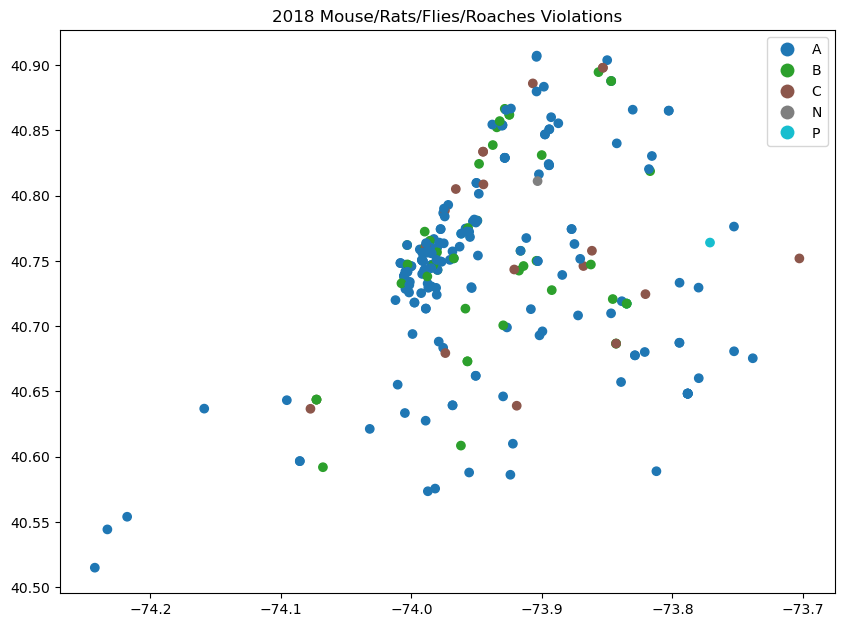

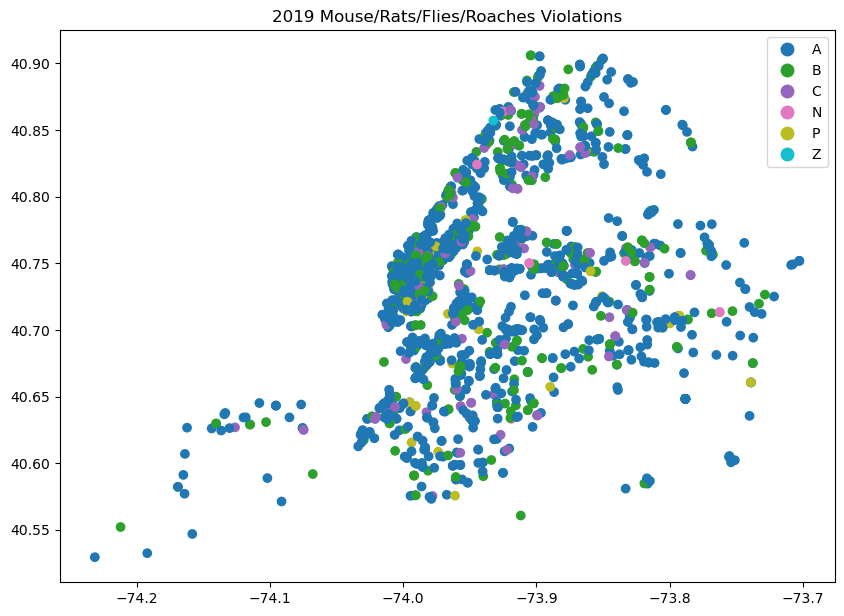

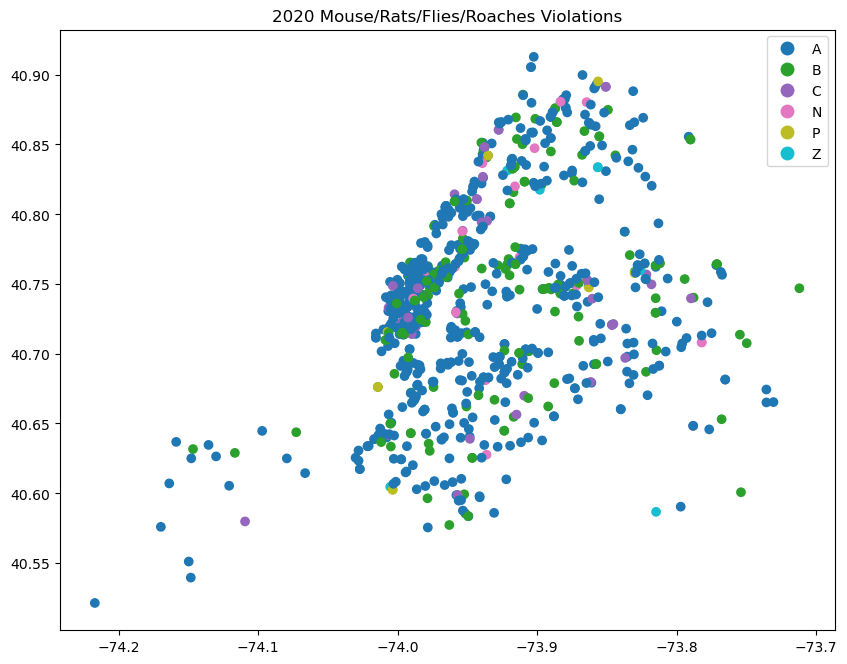

In [104]:
# coloring by grade and plot 

# 2018
gdf_2018.plot(column='GRADE', figsize=(10,10), legend=True)
plt.title('2018 Mouse/Rats/Flies/Roaches Violations')
# 2019
gdf_2019.plot(column='GRADE', figsize=(10,10), legend=True)
plt.title('2019 Mouse/Rats/Flies/Roaches Violations')
# 2020
gdf_2020.plot(column='GRADE', figsize=(10,10), legend=True)
plt.title('2020 Mouse/Rats/Flies/Roaches Violations')
plt.show()
